<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL.github.io/blob/main/2022_Catchers_Frame_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# import packages
%%capture
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
frame_all = pd.read_csv('/content/drive/MyDrive/TDIR/2022 catcher_framing .csv')

In [58]:
frame_all.head()

,last_name,first_name,player_name,player_id,n_called_pitches,runs_extra_strikes,strike_rate,strike_rate_11,strike_rate_12,strike_rate_13,strike_rate_14,strike_rate_16,strike_rate_17,strike_rate_18,strike_rate_19
0,Trevino,Jose,"Trevino, Jose",624431,2719,17,53.8,20.6,44.9,19.7,71.1,69.1,40.5,62.3,30.9
1,Heim,Jonah,"Heim, Jonah",641680,2921,12,51.6,31.0,58.8,21.5,65.9,70.9,36.2,48.3,26.9
2,d'Arnaud,Travis,"d'Arnaud, Travis",518595,2813,10,48.9,21.6,43.0,25.0,65.5,60.3,37.6,57.1,24.9
3,Kirk,Alejandro,"Kirk, Alejandro",672386,1978,9,50.8,24.1,47.0,14.5,71.0,60.8,42.1,58.5,20.7
4,Raleigh,Cal,"Raleigh, Cal",663728,2777,9,49.2,21.9,54.5,24.3,65.1,62.5,26.7,57.3,27.4


In [59]:
features = ["strike_rate_11", "strike_rate_12", "strike_rate_13", "strike_rate_14", "strike_rate_16", "strike_rate_17", "strike_rate_18","strike_rate_19"]
target = "runs_extra_strikes"

In [60]:
X_train, X_test, y_train, y_test = train_test_split(frame_all[features], frame_all[target], test_size=0.2, random_state=42)

In [61]:
model = RandomForestRegressor(random_state=42)

In [62]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
importance_scores = model.feature_importances_

In [64]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

In [65]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [66]:
print(feature_importance_df)

          Feature  Importance
7  strike_rate_19    0.231703
6  strike_rate_18    0.194125
1  strike_rate_12    0.147339
5  strike_rate_17    0.119125
0  strike_rate_11    0.103561
4  strike_rate_16    0.100373
3  strike_rate_14    0.060099
2  strike_rate_13    0.043674


In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 25.258391666666665
R-squared: 0.48276331058020483


In [69]:
import matplotlib.pyplot as plt

In [70]:
# importance_scores with the variable containing the importance scores from model
importance_scores = [0.231703, 0.194125, 0.147339, 0.119125, 0.103561,0.100373, 0.060099,0.043674]

# list of features used in the model
features = ["strike_rate_19", " strike_rate_18","strike_rate_12", "strike_rate_17", "strike_rate_11","strike_rate_16","strike_rate_14 ","strike_rate_13"]

# Create the DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

# Sort the DataFrame by Importance in descending order to get the ranking
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

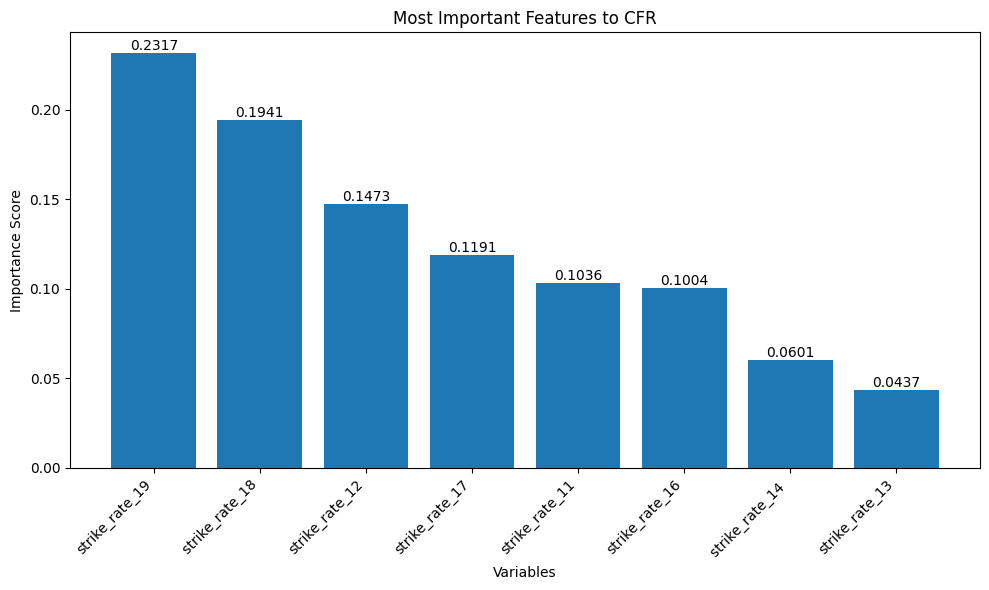

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance Score')
plt.title('Most Important Features to CFR')
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability

# Add the importance values as text over the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [72]:
# Find the minimum and maximum values for each variable
min_strike_rate_19 = frame_all['strike_rate_19'].min()
max_strike_rate_19 = frame_all['strike_rate_19'].max()

min_strike_rate_18 = frame_all['strike_rate_18'].min()
max_strike_rate_18 = frame_all['strike_rate_18'].max()

min_strike_rate_12 = frame_all['strike_rate_12'].min()
max_strike_rate_12 = frame_all['strike_rate_12'].max()

min_strike_rate_17 = frame_all['strike_rate_17'].min()
max_strike_rate_17 = frame_all['strike_rate_17'].max()

min_strike_rate_11  = frame_all['strike_rate_11'].min()
max_strike_rate_11  = frame_all['strike_rate_11'].max()

min_strike_rate_16  = frame_all['strike_rate_16'].min()
max_strike_rate_16  = frame_all['strike_rate_16'].max()

min_strike_rate_14  = frame_all['strike_rate_14'].min()
max_strike_rate_14  = frame_all['strike_rate_14'].max()

min_strike_rate_13 = frame_all['strike_rate_13'].min()
max_strike_rate_13 = frame_all['strike_rate_13'].max()


# Print the minimum and maximum values
print("Minimum strike_rate_19:", min_strike_rate_19)
print("Maximum strike_rate_19:", max_strike_rate_19)

print("Minimum strike_rate_18:", min_strike_rate_18)
print("Maximum strike_rate_18:", max_strike_rate_18)

print("Minimum strike_rate_12:", min_strike_rate_12)
print("Maximum strike_rate_12:", max_strike_rate_12)

print("Minimum  strike_rate_17 :", min_strike_rate_17 )
print("Maximum  strike_rate_17 :", max_strike_rate_17 )

print("Minimum strike_rate_11:", max_strike_rate_11)
print("Maximum strike_rate_11:", min_strike_rate_11)

print("Minimum strike_rate_16:", min_strike_rate_16)
print("Maximum strike_rate_16:", max_strike_rate_16)

print("Minimum strike_rate_14:", min_strike_rate_14)
print("Maximum strike_rate_14:", max_strike_rate_14)

print("Minimum strike_rate_13:", min_strike_rate_13)
print("Maximum strike_rate_13:", max_strike_rate_13)

Minimum strike_rate_19: 12.8
Maximum strike_rate_19: 35.3
Minimum strike_rate_18: 36.9
Maximum strike_rate_18: 67.1
Minimum strike_rate_12: 36.4
Maximum strike_rate_12: 60.6
Minimum  strike_rate_17 : 17.7
Maximum  strike_rate_17 : 46.2
Minimum strike_rate_11: 32.4
Maximum strike_rate_11: 11.5
Minimum strike_rate_16: 51.0
Maximum strike_rate_16: 71.9
Minimum strike_rate_14: 48.8
Maximum strike_rate_14: 71.4
Minimum strike_rate_13: 11.6
Maximum strike_rate_13: 37.1


In [73]:
# Normalize the variables
normalized_strike_rate_19 = (frame_all['strike_rate_19'] - min_strike_rate_19) / (max_strike_rate_19 - min_strike_rate_19)

normalized_strike_rate_18 = (frame_all['strike_rate_18'] - min_strike_rate_18) / (max_strike_rate_18 - min_strike_rate_18)

normalized_strike_rate_12 = (frame_all['strike_rate_12'] - min_strike_rate_12) / (max_strike_rate_12 - min_strike_rate_12)

normalized_strike_rate_17 = (frame_all['strike_rate_17'] - min_strike_rate_17) / (max_strike_rate_17 - min_strike_rate_17)

normalized_strike_rate_11 = (frame_all['strike_rate_11'] - min_strike_rate_11) / (max_strike_rate_11 - min_strike_rate_11)

normalized_strike_rate_16 = (frame_all['strike_rate_16'] - min_strike_rate_16) / (max_strike_rate_16 - min_strike_rate_16)

normalized_strike_rate_14 = (frame_all['strike_rate_14'] - min_strike_rate_14) / (max_strike_rate_14 - min_strike_rate_14)

normalized_strike_rate_13 = (frame_all['strike_rate_13'] - min_strike_rate_13) / (max_strike_rate_13 - min_strike_rate_13)

# Display the normalized values
frame_all['strike_rate_19'] = normalized_strike_rate_19

frame_all['strike_rate_18'] = normalized_strike_rate_18

frame_all['strike_rate_17'] = normalized_strike_rate_17

frame_all['strike_rate_12'] = normalized_strike_rate_12

frame_all['strike_rate_11'] = normalized_strike_rate_11

frame_all['strike_rate_16'] = normalized_strike_rate_16

frame_all['strike_rate_14'] = normalized_strike_rate_14

frame_all['strike_rate_13'] = normalized_strike_rate_13

print(frame_all[['strike_rate_19', 'strike_rate_18', 'strike_rate_17','strike_rate_12', 'strike_rate_11', 'strike_rate_16', 'strike_rate_14', 'strike_rate_13']])

    strike_rate_19  strike_rate_18  strike_rate_17  strike_rate_12  \
0         0.804444        0.841060        0.800000        0.351240   
1         0.626667        0.377483        0.649123        0.925620   
2         0.537778        0.668874        0.698246        0.272727   
3         0.351111        0.715232        0.856140        0.438017   
4         0.648889        0.675497        0.315789        0.747934   
5         0.813333        0.576159        0.424561        0.487603   
6         0.515556        0.605960        0.687719        0.438017   
7         0.893333        0.592715        0.480702        0.561983   
8         0.435556        0.211921        0.428070        1.000000   
9         0.604444        0.456954        0.582456        0.983471   
10        0.746667        0.745033        0.807018        0.301653   
11        0.422222        0.324503        0.087719        0.946281   
12        0.257778        0.605960        0.800000        0.673554   
13        0.640000  

In [74]:
# Importance scores from the importance model
importance_scores = {
   "strike_rate_19": 0.231703,
   "strike_rate_18": 0.194125,
   "strike_rate_12": 0.147339,
   "strike_rate_17": 0.119125,
   "strike_rate_11": 0.103561,
   "strike_rate_16": 0.100373,
   "strike_rate_14": 0.060099,
   "strike_rate_13": 0.043674
}

# Calculate the sum of importance scores
total_importance = sum(importance_scores.values())

# Normalize and assign weights
weights = {}
for feature, importance in importance_scores.items():
    normalized_importance = importance / total_importance
    weights[feature] = normalized_importance

# Print the weights
print("Feature Weights:")
for feature, weight in weights.items():
    print(f"{feature}: {weight}")

Feature Weights:
strike_rate_19: 0.23170323170323168
strike_rate_18: 0.1941251941251941
strike_rate_12: 0.14733914733914732
strike_rate_17: 0.11912511912511911
strike_rate_11: 0.10356110356110355
strike_rate_16: 0.10037310037310036
strike_rate_14: 0.060099060099060096
strike_rate_13: 0.04367404367404367


In [75]:
# Define weights for each variable
weight_strike_rate_19 =  0.23170323170323168
weight_strike_rate_18 = 0.1941251941251941
weight_strike_rate_12 = 0.14733914733914732
weight_strike_rate_17 = 0.11912511912511911
weight_strike_rate_11 = 0.10356110356110355
weight_strike_rate_16 = 0.10037310037310036
weight_strike_rate_14 = 0.060099060099060096
weight_strike_rate_13 = 0.04367404367404367


# Normalize the weights to add up to 1.0
total_weight_sum = (
weight_strike_rate_19 +
weight_strike_rate_18 +
weight_strike_rate_12 +
weight_strike_rate_17 +
weight_strike_rate_11 +
weight_strike_rate_16 +
weight_strike_rate_14 +
weight_strike_rate_13
)

weight_strike_rate_19 /= total_weight_sum
weight_strike_rate_18 /= total_weight_sum
weight_strike_rate_12 /= total_weight_sum
weight_strike_rate_17 /= total_weight_sum
weight_strike_rate_11  /= total_weight_sum
weight_strike_rate_16 /= total_weight_sum
weight_strike_rate_14 /= total_weight_sum
weight_strike_rate_13 /= total_weight_sum

# Display the normalized weights
print("Normalized Weights:")
print("strike_rate_19:", weight_strike_rate_19)
print("strike_rate_18:", weight_strike_rate_18)
print("strike_rate_12:", weight_strike_rate_12)
print("strike_rate_17:", weight_strike_rate_17)
print("strike_rate_11:", weight_strike_rate_11)
print("strike_rate_16:", weight_strike_rate_16)
print("strike_rate_14:", weight_strike_rate_14)
print("strike_rate_13:", weight_strike_rate_13)


Normalized Weights:
strike_rate_19: 0.23170323170323168
strike_rate_18: 0.1941251941251941
strike_rate_12: 0.14733914733914732
strike_rate_17: 0.11912511912511911
strike_rate_11: 0.10356110356110355
strike_rate_16: 0.10037310037310036
strike_rate_14: 0.060099060099060096
strike_rate_13: 0.04367404367404367


In [76]:
CFR =(0.23170323170323168 * normalized_strike_rate_19)+ (0.1941251941251941 * normalized_strike_rate_18) +(0.14733914733914732 * normalized_strike_rate_12) +(0.11912511912511911 * normalized_strike_rate_17) +(0.10356110356110355 * normalized_strike_rate_11) +(0.10037310037310036 * normalized_strike_rate_16) +(0.060099060099060096 * normalized_strike_rate_14) +(0.04367404367404367 * normalized_strike_rate_13 )

In [77]:
frame_all['CFR'] =  (
    weight_strike_rate_19 * frame_all['strike_rate_19'] +
    weight_strike_rate_18 * frame_all['strike_rate_18'] +
    weight_strike_rate_12 * frame_all['strike_rate_12'] +
    weight_strike_rate_17 * frame_all['strike_rate_17'] +
    weight_strike_rate_11 * frame_all['strike_rate_11'] +
    weight_strike_rate_16 * frame_all['strike_rate_16'] +
    weight_strike_rate_14 * frame_all['strike_rate_14'] +
    weight_strike_rate_13 * frame_all['strike_rate_13']

)

In [78]:
CFR_scores = frame_all['CFR']

# Check if there are any missing or NaN values in the 'TDIR_scores'
if CFR_scores.isnull().any():
    raise ValueError("CFR scores contain missing or NaN values")

# Calculate the average TDIR score
average_CFR = CFR_scores.mean()

print("Average CFR:", average_CFR)

Average CFR: 0.48232410462989406


In [79]:
print(frame_all[['player_name', 'CFR']])

               player_name       CFR
0            Trevino, Jose  0.701906
1              Heim, Jonah  0.686810
2         d'Arnaud, Travis  0.539882
3          Kirk, Alejandro  0.560224
4             Raleigh, Cal  0.601158
5             Murphy, Sean  0.629241
6            Narváez, Omar  0.546984
7              Nido, Tomás  0.646187
8           Molina, Yadier  0.576528
9            Serven, Brian  0.612868
10        Higashioka, Kyle  0.556266
11        Grandal, Yasmani  0.471033
12        Rutschman, Adley  0.596852
13            Zavala, Seby  0.661755
14           Kelly, Carson  0.499947
15         Heineman, Tyler  0.530693
16          McGuire, Reese  0.491120
17            Delay, Jason  0.605861
18          Garcia, Aramis  0.554733
19           McCann, James  0.541818
20           Jeffers, Ryan  0.566499
21          Barnes, Austin  0.635364
22          Hedges, Austin  0.577742
23           Sánchez, Gary  0.532199
24      Vázquez, Christian  0.539815
25         Plawecki, Kevin  0.499033
2